### Figure 1 redshift distribution

In [1]:
from astropy.io import fits
import pandas as pd

# Read fits files
# file_path = 'final_matched_highz_catalogue.fits'  # the fits table from the outcome of the scripts
# with fits.open(file_path) as hdul:
#     data = hdul[1].data  # 
#     df = pd.DataFrame(data)  # to Pandas DataFrame
data_path = '../final_matched_highz_catalogue.csv'  # the output csv file
df=pd.read_csv(data_path, encoding='gbk')  # read the csv file
# check the columns and first few rows
print(df.columns)
print(df.head())

Index(['sdss_name', 'sdss_ra', 'sdss_dec', 'sdss_z', 'sdss_source_z',
       'sdss_zwarning', 'z_reliable_flag', 'FIRST', 'match_tier_first',
       'Fpeak_first', 'Fint_first', 'Rms_first', 'NVSS', 'match_tier_nvss',
       'S1.4_nvss', 'e_S1.4_nvss', 'GLEAM', 'match_tier_gleam', 'Fpwide_gleam',
       'e_Fpwide_gleam', 'Fintwide_gleam', 'e_Fintwide_gleam', 'RACS-DR1',
       'match_tier_racs', 'Fpk_racs', 'e_Fpk_racs', 'Ftot_racs', 'e_Ftot_racs',
       'match_tier_flag'],
      dtype='object')
            sdss_name   sdss_ra   sdss_dec  sdss_z sdss_source_z  \
0  000017.32-044502.3  0.072189  -4.750661   3.275          PIPE   
1  000023.29+014501.8  0.097058   1.750519   3.097          PIPE   
2  000051.56+001202.5  0.214857   0.200716   3.865            VI   
3  000055.68-100143.6  0.232028 -10.028793   3.264            VI   
4  000144.88-095630.8  0.437025  -9.941897   3.347            VI   

   sdss_zwarning  z_reliable_flag             FIRST  match_tier_first  \
0              0

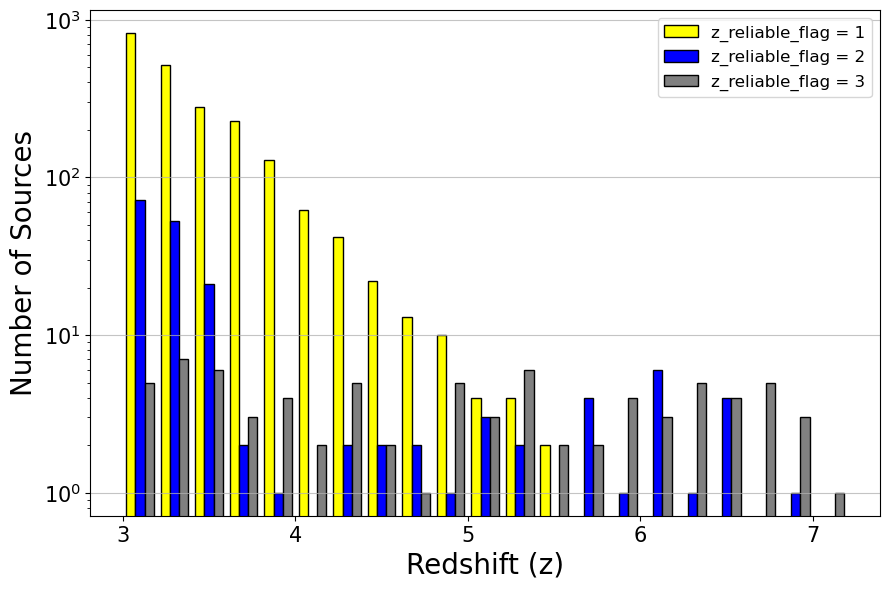

In [2]:
from matplotlib import pyplot as plt

#draw the hitogram figure for redshift distribution
plt.figure(figsize=(9, 6))
# start from z= 3 and ends at z= 7.2, bin width is 0.2
z_flag_1 = df[df['z_reliable_flag'] == 1]['sdss_z']
z_flag_2 = df[df['z_reliable_flag'] == 2]['sdss_z']
z_flag_3 = df[df['z_reliable_flag'] == 3]['sdss_z']
z_all = df['sdss_z']

plt.hist([z_flag_1, z_flag_2, z_flag_3], bins=21, range=(3, 7.2),
         stacked=False,
         edgecolor='black',
         color=['yellow', 'blue', 'grey'],
         label=['z_reliable_flag = 1', 'z_reliable_flag = 2', 'z_reliable_flag = 3'])
#bin_edges = np.linspace(3, 7.2, 22); width = 0.2
# plt.hist(df['sdss_z'], bins=21, range=(3, 7.2), color='blue', edgecolor='black')
# plt.hist(z_flag_3, bins=bin_edges, alpha=0.9, width=width/3, align='mid', color='grey', label='Redshift from z_flag_3', rwidth=0.9)
# plt.hist(z_flag_2, bins=bin_edges, alpha=0.9, width=width/3, align='mid', color='blue', label='Redshift from z_flag_2', rwidth=0.9, 
#          histtype='bar', bottom=None)
# plt.hist(z_flag_1, bins=bin_edges, alpha=0.9, width=width/3, align='mid', color='yellow', label='Redshift from z_flag_1', rwidth=0.9, 
#          histtype='bar', bottom=None)
# # add another histogram for only sdss_source_z != PIPE
# plt.hist(df[df['sdss_source_z'] != 'PIPE']['sdss_z'], bins=21, range=(3, 7.2), color='yellow', alpha=0.5, edgecolor='white')
plt.legend(loc='upper right',fontsize=12)
# plt.title('Redshift Distribution', fontsize=20)
plt.xlabel('Redshift (z)', fontsize=20)
plt.ylabel('Number of Sources', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.grid(axis='y', alpha=0.75)
# using log scale for y-axis
plt.yscale('log')
plt.tight_layout()
plt.savefig('redshift_distribution.pdf', format='pdf',  dpi=300)
plt.show()

In [3]:
# show the numbers of every redshift range
# z>3 is 1515
# check z>4 
print("Number of sources with z >= 3:", len(df[df['sdss_z'] >= 3]))
# check z>4
print("Number of sources with z >= 4:", len(df[df['sdss_z'] >= 4]))
# check z>5
print("Number of sources with z >= 5:", len(df[df['sdss_z'] >= 5]))
# check z>6
print("Number of sources with z >= 6:", len(df[df['sdss_z'] >= 6]))
# check z>7
print("Number of sources with z >= 7:", len(df[df['sdss_z'] >= 7]))
# for a statistical check, just look for match_tier_first =1 source with each redshift range
print("Number of sources with z >= 3 and match_tier_first = 1:", len(df[(df['sdss_z'] >= 3) & (df['match_tier_first'] == 1)]))
# check the number of sources with z > 3 and match_tier_first = 1
print("Number of sources with z >= 4 and match_tier_first = 1:", len(df[(df['sdss_z'] >= 4) & (df['match_tier_first'] == 1)]))
# check the number of sources with z > 5 and match_tier_first = 1
print("Number of sources with z >= 5 and match_tier_first = 1:", len(df[(df['sdss_z'] >= 5) & (df['match_tier_first'] == 1)]))
# check the number of sources with z > 6 and match_tier_first = 1
print("Number of sources with z >= 6 and match_tier_first = 1:", len(df[(df['sdss_z'] >= 6) & (df['match_tier_first'] == 1)]))
# check the number of sources with z > 7 and match_tier_first = 1
print("Number of sources with z >= 7 and match_tier_first = 1:", len(df[(df['sdss_z'] >= 7) & (df['match_tier_first'] == 1)]))

# COunt source numbers that has sdss_source_z != PIPE & source_z > 5
print("Number of sources with reliable redshift: ", len(df[(df['z_reliable_flag'] ==1) & (df['sdss_z'] >= 5) ]))





Number of sources with z >= 3: 2388
Number of sources with z >= 4: 241
Number of sources with z >= 5: 70
Number of sources with z >= 6: 33
Number of sources with z >= 7: 1
Number of sources with z >= 3 and match_tier_first = 1: 1655
Number of sources with z >= 4 and match_tier_first = 1: 187
Number of sources with z >= 5 and match_tier_first = 1: 52
Number of sources with z >= 6 and match_tier_first = 1: 24
Number of sources with z >= 7 and match_tier_first = 1: 1
Number of sources with reliable redshift:  10


### Figure 2, draw the radio detection rate vs redshift figure.

In [ ]:
# 读取 FITS 文件
import numpy as np
from astropy.table import Table

file_path = 'tmp_sdssz3.fits' 
with fits.open(file_path) as hdul:
    data = hdul[1].data
    # 创建新的字段字典，每列单独判断处理
    fixed_columns = {}
    for name in data.names:
        col = data[name]
        # 如果是数字列，就转换为本地字节序（避免 big-endian 报错）
        if np.issubdtype(col.dtype, np.number):
            fixed_columns[name] =  col.byteswap().view(col.dtype.newbyteorder())
        else:
            fixed_columns[name] = col  # 字符串或 bool 列保留

    # 转换为 DataFrame
    df2 = pd.DataFrame(fixed_columns)
# 查看列名和前几行
print(df2.columns)
print(df2.head())
source_z = df2['Z']
source_z

In [ ]:
# check z>3
print("Number of sources with z >= 3:", len(df2[source_z >= 3.0]))
print("Number of sources with 3 <= z < 4:", len(df2[(source_z >= 3) & (source_z < 4)]))
# check z>4
print("Number of sources with z >= 4:", len(df2[source_z >= 4.0]))
print("Number of sources with 4 <= z < 5:", len(df2[(source_z >= 4) & (source_z < 5)]))
# check z>5
print("Number of sources with z >= 5:", len(df2[source_z >= 5]))


In [ ]:
# make a plot for radio detection rate along different redshift bins
import matplotlib.pyplot as plt
import numpy as np
# Define redshift bins and their edges
data_bin_width = 0.2
redshift_bins = np.arange(3, 5.2, data_bin_width)
# Define the number of sources in each bin
radio_detection_rate = []
radio_detection_rate2 = []
optical_number = []
for z in redshift_bins:
    # Count sources with z in the current bin and match_tier_first = 1
    radio_count = len(df[(df['sdss_z'] >= z) &(df['z_reliable_flag'] ==1)& (df['match_tier_first'] == 1) & (df['sdss_z'] < z + data_bin_width)])
    radio_count2 = len(df[(df['sdss_z'] >= z) &(df['z_reliable_flag'] <=2)& (df['sdss_z'] < z + data_bin_width)])
    optical_count = len(df2[(source_z >= z) & (source_z < z + data_bin_width)])
    radio_rate = radio_count / optical_count if optical_count > 0 else 0
    count = radio_rate * 100  # Convert to percentage
    count2 = radio_count2 / optical_count * 100 if optical_count > 0 else 0
    radio_detection_rate.append(count)
    radio_detection_rate2.append(count2)
    optical_number.append(optical_count)
# Plotting the radio detection rate
plt.figure(figsize=(10, 6))
plt.plot(redshift_bins, radio_detection_rate, linestyle='-', color='blue', label='tier 1 sources')
plt.plot(redshift_bins, radio_detection_rate2, linestyle='--', color='orange', label='All sources')
# plt.plot(redshift_bins, optical_number, linestyle='--', color='green', label='All optical sources')
plt.title('Radio Detection Rate vs Redshift')
plt.xlabel('Redshift (z)')
plt.ylabel('Radio Detection Rate (%)')
plt.xticks(np.arange(3, 5.2, 0.2))
# plt.yscale('log')
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig('radio_detection_rate_vs_redshift.pdf', format='pdf', dpi=300)
plt.show()

### Figure 3: the distribution of angular separation vs match_tier_flag

In [ ]:
import numpy as np

In [ ]:
file_path = 'ref_o1r1234_all_sources.fits' 
with fits.open(file_path) as hdul:
    data = hdul[1].data
    # 创建新的字段字典，每列单独判断处理
    fixed_columns = {}
    for name in data.names:
        col = data[name]
        # 如果是数字列，就转换为本地字节序（避免 big-endian 报错）
        if np.issubdtype(col.dtype, np.number):
            fixed_columns[name] = col.byteswap().view(col.dtype.newbyteorder())
        else:
            fixed_columns[name] = col  # 字符串或 bool 列保留

    # 转换为 DataFrame
    df2 = pd.DataFrame(fixed_columns)
# 查看列名和前几行
print(df2.columns)

In [ ]:
hz_df2=df2[df2['sdss_z'] >= 3.0]
#drop the original index of hz_df2
hz_df2.reset_index(drop=True, inplace=True)
hz_df=df[df['sdss_z'] >= 3].reset_index(drop=True)
z_reliable_flag = hz_df['z_reliable_flag']
match_tier_flag = hz_df['match_tier_flag']
# concat the two Series with the hz_df2 and form new_hz_df2
new_hz_df2 = pd.concat([hz_df2, z_reliable_flag, match_tier_flag], axis=1)
new_hz_df2 = new_hz_df2[(new_hz_df2['z_reliable_flag']==1) & (new_hz_df2['match_tier_flag'] > 0)].reset_index(drop=True)
new_hz_df2 = new_hz_df2[(new_hz_df2['match_tier_nvss']!=3) & (new_hz_df2['match_tier_gleam']!=3) & (new_hz_df2['match_tier_gleam']!=2)].reset_index(drop=True)
new_hz_df2.columns()

In [ ]:
# Plotting the separation distribution with match_tier_flag
tier_flag = new_hz_df2['match_tier_flag']
first_sep = new_hz_df2['Separation_first']
nvss_sep = new_hz_df2['Separation_nvss']
gleam_sep = new_hz_df2['Separation_gleam']
racs_sep = new_hz_df2['Separation_racs']


plt.figure(figsize=(10, 6))
plt.scatter(first_sep, tier_flag, color='black')
plt.scatter(racs_sep, tier_flag, color='black')
plt.scatter(nvss_sep, tier_flag, color='black')
plt.scatter(gleam_sep, tier_flag, color='black')
# plt.plot(redshift_bins, radio_detection_rate2, linestyle='--', color='orange', label='All sources')
# plt.plot(redshift_bins, optical_number, linestyle='--', color='green', label='All optical sources')
plt.title('Radio match_tier_flag vs Separation')
plt.xlabel('Separation (arcsec)')
plt.ylabel('match_tier_flag')
# plt.xticks(np.arange(3, 5.2, 0.2))
# plt.yscale('log')
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig('match_tier_flag vs separation.pdf', format='pdf', dpi=300)
plt.show()

In [ ]:
test_df=new_hz_df2[(new_hz_df2['match_tier_flag']>=12)]
test_df = test_df[['sdss_name','Separation_gleam']]
test_df.sort_values(by='Separation_gleam', ascending=True, inplace=True)
print(test_df)
# test_df.to_csv('test_df.csv', index=False)

### Fig 4 UpSet plot of the final table

In [4]:
import pandas as pd
from astropy.io import fits
import numpy as np
from astropy.table import Table

final_table_path = 'final_matched_highz_catalogue.fits'
ref_table_patha = 'matched_radio_highz_catalogue.fits'
ref_table_pathb = 'ref_o1r1234_all_sources.fits'

In [5]:
with fits.open(final_table_path) as hdul:
    data = hdul[1].data
    table_fi = Table(data)
df_fi = table_fi.to_pandas()
with fits.open(ref_table_pathb) as hdul:
    data = hdul[1].data
    table_ref = Table(data)
df_ref = table_ref.to_pandas()


In [6]:
df_fi

,sdss_name,sdss_ra,sdss_dec,sdss_z,sdss_source_z,sdss_zwarning,z_reliable_flag,FIRST_r1,match_tier_first,Fpeak_r1,...,Fpwide_r3,e_Fpwide_r3,Fintwide_r3,e_Fintwide_r3,RACS-DR1_r4,match_tier_racs,Fpk_r4,e_Fpk_r4,Ftot_r4,e_Ftot_r4
0,102651.46+590628.0,156.714441,59.107796,3.407000,VI,0,1,J102651.4+590628,1,79.69,...,NaN,NaN,NaN,NaN,,-2147483648,NaN,NaN,NaN,NaN
1,100025.33+590459.6,150.105554,59.083246,3.502000,VI,0,1,J100025.3+590459,1,30.57,...,NaN,NaN,NaN,NaN,,-2147483648,NaN,NaN,NaN,NaN
2,102032.50+585849.2,155.135452,58.980348,3.421000,VI,0,1,J102032.5+585849,1,51.25,...,NaN,NaN,NaN,NaN,,-2147483648,NaN,NaN,NaN,NaN
3,111014.02+585744.1,167.558426,58.962254,3.102000,VI,0,1,J111014.0+585744,1,1.84,...,NaN,NaN,NaN,NaN,,-2147483648,NaN,NaN,NaN,NaN
4,130204.52+585353.9,195.518857,58.898307,3.281111,PIPE,0,2,J130204.5+585353,1,1.15,...,NaN,NaN,NaN,NaN,,-2147483648,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2383,230857.19+234006.0,347.238317,23.668349,3.387000,VI,0,1,,-2147483648,NaN,...,NaN,NaN,NaN,NaN,J230857.3+234009,1,1.428,0.271,2.299,0.656
2384,230650.41+253331.1,346.710057,25.558644,3.135000,VI,0,1,,-2147483648,NaN,...,NaN,NaN,NaN,NaN,J230650.3+253331,1,1.580,0.249,1.654,0.449
2385,231032.87-013329.5,347.636986,-1.558213,3.048000,VI,0,1,,-2147483648,NaN,...,NaN,NaN,NaN,NaN,J231032.8-013333,1,1.695,0.351,2.056,0.696
2386,234109.47+213302.5,355.289460,21.550701,3.145000,VI,0,1,,-2147483648,NaN,...,NaN,NaN,NaN,NaN,J234109.4+213302,1,2.853,0.316,3.099,0.579


In [7]:
#from df_ref, only extract rows with same sdss_name as df_fi
df_ref_filtered = df_ref[df_ref['sdss_name'].isin(df_fi['sdss_name'])].reset_index(drop=True)

# check the columns and first few rows
print(df_ref_filtered.shape)

df_goodz = df_fi[df_fi['z_reliable_flag'] == 1].reset_index(drop=True)
print(df_goodz.shape)

(2388, 96)
(2132, 28)


In [8]:
# gather necessary columns for plotting the upsetplot
from upsetplot import from_indicators
from upsetplot import UpSet
import matplotlib.pyplot as plt
df_upset = df_goodz
df_upset['FIRST'] = df_upset['match_tier_first'].isin([1, 2, 3])
df_upset['NVSS'] = df_upset['match_tier_nvss'].isin([1, 2, 3])
df_upset['GLEAM'] = df_upset['match_tier_gleam'].isin([1, 2, 3])
df_upset['RACS'] = df_upset['match_tier_racs'].isin([1, 2, 3])

upset_data = from_indicators(data=df_upset, indicators=['FIRST', 'NVSS', 'GLEAM', 'RACS'])

In [10]:
def get_tier_flag(row):
    tiers = [row['match_tier_first'], row['match_tier_nvss'],
             row['match_tier_gleam'], row['match_tier_racs']]
    if any(t in [2, 3] for t in tiers):
        return 'tier23'
    elif any(t == 1 for t in tiers):
        return 'tier_1'
    else:
        return 'none'  # 可选
df_upset['tier_flag'] = df_upset.apply(get_tier_flag, axis=1)

In [11]:
upset_data = from_indicators(data=df_upset, indicators=['FIRST', 'NVSS', 'GLEAM', 'RACS'])
upset_data

sdss_name     sdss_ra   sdss_dec  sdss_z  \
FIRST NVSS  GLEAM RACS                                                       
True  True  False False  102651.46+590628.0  156.714441  59.107796   3.407   
                  False  100025.33+590459.6  150.105554  59.083246   3.502   
                  False  102032.50+585849.2  155.135452  58.980348   3.421   
                  False  111014.02+585744.1  167.558426  58.962254   3.102   
                  False  155307.12+585013.5  238.279675  58.837088   3.709   
...                                     ...         ...        ...     ...   
False False False True   230857.19+234006.0  347.238317  23.668349   3.387   
                  True   230650.41+253331.1  346.710057  25.558644   3.135   
                  True   231032.87-013329.5  347.636986  -1.558213   3.048   
                  True   234109.47+213302.5  355.289460  21.550701   3.145   
                  True   234830.29+011042.6  357.126242   1.178515   3.771   

                        sdss_source_z  sdss_zwarning  z_reliable_flag  \
FIRST NVSS  GLEAM RACS                                                  
True  True  False False            VI              0                1   
                  False            VI              0                1   
                  False            VI              0                1   
                  False            VI              0                1   
                  False            VI              4                1   
...                               ...            ...              ...   
False False False True             VI              0                1   
                  True             VI              0                1   
                  True             VI              0                1   
                  True             VI              0                1   
                  True             VI              0                1   

                                 FIRST_r1  match_tier_first  Fpeak_r1  ...  \
FIRST NVSS  GLEAM RACS                                                 ...   
True  True  False False  J102651.4+590628                 1     79.69  ...   
                  False  J100025.3+590459                 1     30.57  ...   
                  False  J102032.5+585849                 1     51.25  ...   
                  False  J111014.0+585744                 1      1.84  ...   
                  False  J155307.0+585013                 1      1.06  ...   
...                                   ...               ...       ...  ...   
False False False True                          -2147483648       NaN  ...   
                  True                          -2147483648       NaN  ...   
                  True                          -2147483648       NaN  ...   
                  True                          -2147483648       NaN  ...   
                  True                          -2147483648       NaN  ...   

                         match_tier_racs  Fpk_r4 e_Fpk_r4  Ftot_r4  e_Ftot_r4  \
FIRST NVSS  GLEAM RACS                                                          
True  True  False False      -2147483648     NaN      NaN      NaN        NaN   
                  False      -2147483648     NaN      NaN      NaN        NaN   
                  False      -2147483648     NaN      NaN      NaN        NaN   
                  False      -2147483648     NaN      NaN      NaN        NaN   
                  False      -2147483648     NaN      NaN      NaN        NaN   
...                                  ...     ...      ...      ...        ...   
False False False True                 1   1.428    0.271    2.299      0.656   
                  True                 1   1.580    0.249    1.654      0.449   
                  True                 1   1.695    0.351    2.056      0.696   
                  True                 1   2.853    0.316    3.099      0.579   
                  True                 3  22.905    0.298   26.150      0.760   



/Users/yingkangzhang/opt/anaconda3/lib/python3.12/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/Users/yingkangzhang/opt/anaconda3/lib/python3.12/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are settin

<Figure size 640x480 with 0 Axes>

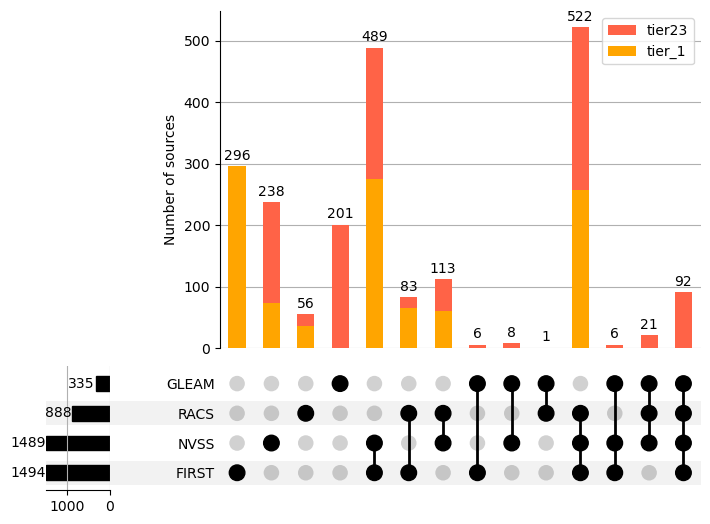

In [12]:
from matplotlib import cm
colors = ["tomato","orange"]
up_2 = UpSet(upset_data, intersection_plot_elements=0,show_counts=True,sort_by='degree')
up_2.add_stacked_bars(by="tier_flag", colors=colors, title="Number of sources", elements=10)

plt.tight_layout()
up_2.plot()
plt.savefig("radio_tier_upsetplot.png", dpi=300)

/Users/yingkangzhang/opt/anaconda3/lib/python3.12/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/Users/yingkangzhang/opt/anaconda3/lib/python3.12/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are settin

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

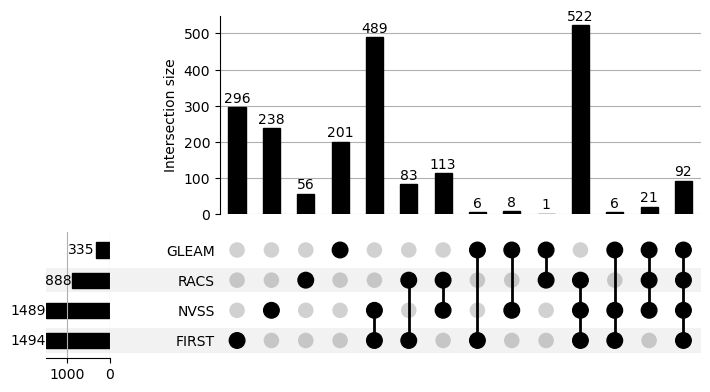

In [13]:
up = UpSet(upset_data, show_counts=True, sort_by='degree')
up.plot()

### Figure 5 likelihood analysis


In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from astropy.io import fits
from astropy.table import Table
#Define the function

def calc_r(ra_opt, dec_opt, ra_radio, dec_radio, sigma_ra_opt, sigma_dec_opt, sigma_ra_radio, sigma_dec_radio):
    """
    Calculate the normalized distance r between optical and radio sources.
    Parameters:
    ras and decs (float): Right Ascension and Declination of the source (both optical and radio) in degrees.
    sigmas (float): Uncertainties in Right Ascension and Declination for both optical and radio sources in arcseconds.
    Returns:
    float: Normalized distance r, based on arcsecond calculations.
    """

    sep_ra = (ra_opt - ra_radio) * np.cos(np.deg2rad(dec_opt))  # Convert to radians for cos
    sep_dec = dec_opt - dec_radio

    # before calculating r, change all variables to arcseconds
    sep_ra *= 3600  # Convert degrees to arcseconds
    sep_dec *= 3600  # Convert degrees to arcseconds
    r = np.sqrt(sep_ra**2/(sigma_ra_opt**2 + sigma_ra_radio**2) + sep_dec**2/(sigma_dec_opt**2 + sigma_dec_radio**2))

    return r

def rayleigh_pdf(x, sigma):
    # The Rayleigh probability density function (PDF)
    return (x / sigma**2) * np.exp(-x**2 / (2 * sigma**2))

In [15]:
# prepare data

final_table_path = 'final_matched_highz_catalogue.fits'
ref_table_patha = 'matched_radio_highz_catalogue.fits'
ref_table_pathb = 'ref_o1r1234_all_sources.fits'
with fits.open(final_table_path) as hdul:
    data = hdul[1].data
    table_fi = Table(data)
df_fi = table_fi.to_pandas()

with fits.open(ref_table_patha) as hdul:
    data = hdul[1].data
    table_fa = Table(data)
df_ref_a = table_fa.to_pandas()


with fits.open(ref_table_pathb) as hdul:
    data = hdul[1].data
    table_fb = Table(data)
df_ref_b = table_fb.to_pandas()

# select subset with z_reliable_flag == 1 and match_tier_first exist and =1
# df_z12 = df_fi[df_fi['z_reliable_flag'] <= 2].reset_index(drop=True)
# This block can be used to various analysis
def get_tier_flag(row,column_use):
    tiers = row[[column_use]]
    if any(t == 1 for t in tiers):
        return 'tier_1'
    elif any(t in [2, 3] for t in tiers):
        return 'tier23'
    else:
        return 'none'  # 可选
def filter_df(df1,df_full,z_flag_lim = 1):
    df1=df1[df1['z_reliable_flag'] <= z_flag_lim].reset_index(drop=True)
    df_full=df_full[(df_full['sdss_name'].isin(df1['sdss_name'])) | (df_full['match_tier_first'] >= -1) \
                     | (df_full['match_tier_nvss'] >= -1) | (df_full['match_tier_gleam'] >= -1) | (df_full['match_tier_racs'] >= -1)
                    ].reset_index(drop=True)
    return df1,df_full

df_good,df_full_good= filter_df(df_fi, df_ref_a, z_flag_lim=2)
df_full_good

,sdss_name,sdss_ra,sdss_dec,sdss_class,sdss_z,sdss_source_z,sdss_z_pipe,sdss_zwarning,sdss_z_vi,sdss_z_conf,...,e_amaj0_r4,e_bmin0_r4,e_PA0_r4,Separation_racs,GrpSize_before_racs,group_z_min_racs,group_z_max_racs,GroupID_racs,GroupSize_racs,match_tier_racs
0,102651.46+590628.0,156.714441,59.107796,QSO,3.407000,VI,3.407636,0,3.407,3.0,...,NaN,NaN,NaN,NaN,-2147483648,NaN,NaN,-2147483648,-2147483648,-2147483648
1,100025.33+590459.6,150.105554,59.083246,QSO,3.502000,VI,3.502315,0,3.502,3.0,...,NaN,NaN,NaN,NaN,-2147483648,NaN,NaN,-2147483648,-2147483648,-2147483648
2,102032.50+585849.2,155.135452,58.980348,QSO,3.421000,VI,3.421338,0,3.421,3.0,...,NaN,NaN,NaN,NaN,-2147483648,NaN,NaN,-2147483648,-2147483648,-2147483648
3,111014.02+585744.1,167.558426,58.962254,QSO,3.102000,VI,3.101355,0,3.102,3.0,...,NaN,NaN,NaN,NaN,-2147483648,NaN,NaN,-2147483648,-2147483648,-2147483648
4,130204.52+585353.9,195.518857,58.898307,QSO,3.281111,PIPE,3.281111,0,-1.000,0.0,...,NaN,NaN,NaN,NaN,-2147483648,NaN,NaN,-2147483648,-2147483648,-2147483648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9792,g232905.62-002711.2,352.273450,-0.453123,GALAXY,0.277300,phot,NaN,-32768,NaN,NaN,...,2.69,2.38,65.870003,2.599479,3,0.277300,3.542561,9168,2,-1
9793,231032.87-013329.5,347.636986,-1.558213,QSO,3.048000,VI,3.047578,0,3.048,3.0,...,6.88,4.73,47.029999,3.573411,1,NaN,NaN,-2147483648,1,1
9794,234109.47+213302.5,355.289460,21.550701,QSO,3.145000,VI,3.140290,0,3.145,3.0,...,3.20,2.61,45.639999,0.215557,1,NaN,NaN,-2147483648,1,1
9795,234830.29+011042.6,357.126242,1.178515,QSO,3.771000,VI,3.789262,0,3.771,3.0,...,0.51,0.28,2.020000,11.336677,2,1.695106,3.771000,9443,2,3


In [16]:
# for sdss, we used a positional uncertainty of 0.1''
# for first, we used a positional uncertainty of 0.4'' (Ivezic2002, Becker1995)
# for nvss, we use values from the table, e_RAJ2000_r2 and e_DEJ2000_r2
# for gleam, similar with nvss, we use e_RAJ2000_r3 and e_DEJ2000_r3
# for racs, we use e_RAJ2000_r4 and e_DEJ2000_r4

# df_ref_filtered = df_full_good
# ra_opt = df_ref_filtered['sdss_ra']; dec_opt = df_ref_filtered['sdss_dec']
# sigma_ra_opt = 0.1 ;sigma_dec_opt = 0.1
# ra_radio = df_ref_filtered['RA_deg_r1']; dec_radio = df_ref_filtered['DEC_deg_r1']
# sigma_ra_radio = 0.4; sigma_dec_radio = 0.4
# df_ref_filtered['likeli_r'] = calc_r(ra_opt, dec_opt, ra_radio, dec_radio, sigma_ra_opt, sigma_dec_opt, sigma_ra_radio, sigma_dec_radio)
def make_df_likeli(df, survey):
    ra_opt = df['sdss_ra']; dec_opt = df['sdss_dec']
    sigma_ra_opt = 0.1 ;sigma_dec_opt = 0.1
    if survey == 'first':
        ra_radio = df['RA_deg_r1']; dec_radio = df['DEC_deg_r1']
        sigma_ra_radio = 0.4; sigma_dec_radio = 0.4
    elif survey == 'nvss':
        ra_radio = df['RA_deg_r2']; dec_radio = df['DEC_deg_r2']
        sigma_ra_radio = df['e_RAJ2000_r2']; sigma_dec_radio = df['e_DEJ2000_r2']
    elif survey == 'gleam':
        ra_radio = df['RA_deg_r3']; dec_radio = df['DEC_deg_r3']
        sigma_ra_radio = df['e_RAJ2000_r3']; sigma_dec_radio = df['e_DEJ2000_r3']
    elif survey == 'racs': 
        ra_radio = df['RA_deg_r4']; dec_radio = df['DEC_deg_r4']
        sigma_ra_radio = df['e_RAJ2000_r4']; sigma_dec_radio = df['e_DEJ2000_r4']
    else:
        raise ValueError("Invalid survey type. Choose from 'first', 'nvss', 'gleam', or 'racs'.")
    likeli_col = f'likeli_{survey}'
    df[likeli_col] = calc_r(ra_opt, dec_opt, ra_radio, dec_radio, sigma_ra_opt, sigma_dec_opt, sigma_ra_radio, sigma_dec_radio)
    print(f"Calculated likelihood r for {survey} survey.")
    return df

df_good_likeli = make_df_likeli(df_full_good, 'first')
df_good_likeli = make_df_likeli(df_good_likeli, 'nvss')
df_good_likeli = make_df_likeli(df_good_likeli, 'gleam')
df_good_likeli = make_df_likeli(df_good_likeli, 'racs')
# before saving to csv, reduce the long floats to 8 digits in case excel mis understand them
df_good_likeli_out = df_good_likeli.copy()
df_good_likeli_out.replace([-32768,-2147483648], 'NA', inplace=True)
df_good_likeli_out = df_good_likeli_out.round(8)
df_good_likeli_out.to_csv('df_good_likeli.csv', index=False)

df_good_likeli.columns

Calculated likelihood r for first survey.
Calculated likelihood r for nvss survey.
Calculated likelihood r for gleam survey.
Calculated likelihood r for racs survey.


Index(['sdss_name', 'sdss_ra', 'sdss_dec', 'sdss_class', 'sdss_z',
       'sdss_source_z', 'sdss_z_pipe', 'sdss_zwarning', 'sdss_z_vi',
       'sdss_z_conf', 'sdss_is_qso_qn', 'sdss_z_qn', 'FIRST_r1', 'RA_deg_r1',
       'DEC_deg_r1', 'Fpeak_r1', 'Fint_r1', 'Rms_r1', 'Maj_r1', 'Min_r1',
       'PA_r1', 'Separation_first', 'GrpSize_before_first',
       'group_z_min_first', 'group_z_max_first', 'GroupID_first',
       'GroupSize_first', 'match_tier_first', 'NVSS_r2', 'RA_deg_r2',
       'e_RAJ2000_r2', 'DEC_deg_r2', 'e_DEJ2000_r2', 'S1.4_r2', 'e_S1.4_r2',
       'MajAxis_r2', 'MinAxis_r2', 'Separation_nvss', 'GrpSize_before_nvss',
       'group_z_min_nvss', 'group_z_max_nvss', 'GroupID_nvss',
       'GroupSize_nvss', 'match_tier_nvss', 'GLEAM_r3', 'RA_deg_r3',
       'e_RAJ2000_r3', 'DEC_deg_r3', 'e_DEJ2000_r3', 'Fpwide_r3',
       'e_Fpwide_r3', 'Fintwide_r3', 'e_Fintwide_r3', 'awide_r3', 'e_awide_r3',
       'bwide_r3', 'e_bwide_r3', 'pawide_r3', 'psfawide_r3', 'psfbwide_r3',
       '

In [17]:
from scipy.stats import rayleigh, kstest
from scipy.optimize import curve_fit

def smooth_weight(x, center=1.0, width=0.5):
    # 高斯核权重：中心center，宽度控制参数width
    return np.exp(-0.5 * ((x - center) / width)**2)

def custom_weight(x, center=1.0, low_bound=0.5, up_bound=1.5):
    if low_bound <= x <= up_bound:
        return 1.0
    else:
        return 1 / ((x - center) ** 2)

# first, r range(0,5), can set to 3, bins=30
# nvss, r range(0,200) , can set to 60, bins=60
# gleam, not sure
# racs, r range(0,100), can set to 40, bins=40

def make_likeli_plot(survey = 'first',
                     data_uplim = 5,
                     show_uplim = 3,
                     bin_size = 0.1,
                     t1_only = False
    ):
    n_bins = int(data_uplim / bin_size)  # Number of bins based on

    df_block_t1  = df_good_likeli[df_good_likeli['match_tier_'+survey] == 1].reset_index(drop=True)
    df_block_t23  = df_good_likeli[df_good_likeli['match_tier_'+survey] >= 2].reset_index(drop=True)
    df_block_tot = df_good_likeli[df_good_likeli['match_tier_'+survey] >= 1].reset_index(drop=True)

    data = df_block_t1['likeli_'+survey]
    data_t23 = df_block_t23['likeli_'+survey]
    data=data.dropna(); data_t23 = data_t23.dropna()
    print(f"The number of data points: {len(data)}")
    data_r = data[data < data_uplim]
    hist, bin_edges = np.histogram(data_r, bins=n_bins, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    # print(hist)
    # print(bin_edges)
    # print(bin_centers)
    weights = np.array([smooth_weight(x) for x in bin_centers])

    popt, pcov = curve_fit(rayleigh_pdf, bin_centers, hist, sigma=1/weights, absolute_sigma=False) 
    sigma_fit = popt[0]
    print(f"拟合参数 sigma = {sigma_fit:.4f}")

    # Make the axis for plot
    plt.figure(figsize=(9, 6))
    if t1_only:
        print("Plotting only tier 1 sources.")
        plt.hist(data_r, bins=n_bins, range=(0, data_uplim),
                edgecolor='black',
                # density=True,  # Normalize the histogram
                color='steelblue',
                label='Likelihood r distribution')
    else:
        print("Plotting tier 1 and tier 2/3 sources.")
        plt.hist([data_r,data_t23], bins=n_bins, range=(0, data_uplim),
        stacked=True,
    #   density=True,  # Normalize the histogram
        edgecolor='black',
        color=['steelblue', 'darkorange'],
        label=['r distribution (tier 1)', 'r distribution (tier 2/3)'])
    print("The fitting will only use tier 1 sources.")
    x = np.linspace(0, data_uplim, 500)
    y_pdf = rayleigh_pdf(x, sigma_fit)
    y_number = y_pdf * len(data_r) * bin_size  # Convert PDF to number density
    # plt.plot(x, y_pdf, 'r-', lw=2)
    plt.plot(x, y_number, 'r--', lw=2, label='Rayleigh PDF fit')
    plt.xlim(0, show_uplim)
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.xlabel('Relative distance r', fontsize=20)
    plt.ylabel('Number of sources', fontsize=20)
    plt.legend(fontsize=14)
    
    plt.tight_layout()
    plt.savefig(f"{survey}_r_distribution.pdf", format='pdf', dpi=200)
    plt.show()

    scale = sigma_fit  # 替换为你的 scale 参数
    upper_bound = rayleigh.ppf(0.997, loc=0, scale=scale)
    print(f"99.7% upper bound = {upper_bound:.4f}")

    rayleigh_dist = rayleigh(scale=sigma_fit)  # 创建瑞利分布对象
    ks_stat, p_value = kstest(data_r, rayleigh_dist.cdf)
    print(f"KS检验统计量: {ks_stat:.4f}, p值: {p_value:.4f}")

In [ ]:
# first, r range(0,5), can set to 3, bins=30
# nvss, r range(0,200) , can set to 60, bins=60
# gleam, not sure
# racs, r range(0,100), can set to 40, bins=40
# 99.7 upper bond (0.48) for first is 1.63; for nvss is (3.6) 12.4; for racs is (1.8) 6.0

# make_likeli_plot(survey = 'first', data_uplim = 5, show_uplim = 3, bin_size = 0.1, t1_only = False)
# make_likeli_plot(survey = 'nvss', data_uplim = 50, show_uplim = 30, bin_size = 0.5, t1_only = False)
make_likeli_plot(survey = 'racs', data_uplim = 40, show_uplim = 14, bin_size = 0.5, t1_only = False)

In [ ]:
def just_show_distance(survey = 'first',
                      show_uplim = 3,
                      bin_size = 0.1,
    ):
    n_bins = int(show_uplim / bin_size)  # Number of bins based on

    df_block_t1  = df_good_likeli[df_good_likeli['match_tier_'+survey] == 1].reset_index(drop=True)
    df_block_t23  = df_good_likeli[df_good_likeli['match_tier_'+survey] >= 2].reset_index(drop=True)
    df_block_tot = df_good_likeli[df_good_likeli['match_tier_'+survey] >= 1].reset_index(drop=True)

    data = df_block_t1['Separation_'+survey]
    data_t23 = df_block_t23['Separation_'+survey]
    data=data.dropna(); data_t23 = data_t23.dropna()
    print(f"The number of data points: {len(data)}")

    plt.figure(figsize=(9, 6))
    plt.hist([data,data_t23], bins=n_bins, range=(0, show_uplim),
         stacked=True,
         edgecolor='black',
         color=['steelblue', 'darkorange'],
         label=[f'Separation_{survey} (tier 1)', f'Separation_{survey} (tier 2/3)'])
    survey_name=survey.upper()
    plt.title(f'{survey_name}-SDSS', fontsize=20)
    plt.xlabel(f'Separation (arcsec)', fontsize=20)
    plt.ylabel('Number of Sources', fontsize=20)
    # using log scale for y-axis
    plt.xlim(0, show_uplim)
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.savefig(f"{survey_name}_SDSS.pdf", format='pdf', dpi=200)
    plt.show()

In [ ]:
# just_show_distance(survey = 'first', show_uplim = 3, bin_size = 0.1)
# just_show_distance(survey = 'nvss', show_uplim = 25, bin_size = 0.5)
just_show_distance(survey = 'gleam', show_uplim = 110, bin_size = 5)
# just_show_distance(survey = 'racs', show_uplim = 14, bin_size = 0.5)

### Figure 6 data analysis

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from astropy.io import fits
from astropy.table import Table
# prepare data

final_table_path = 'final_matched_highz_catalogue.fits'
ref_table_patha = 'matched_radio_highz_catalogue.fits'
ref_table_pathb = 'ref_o1r1234_all_sources.fits'
with fits.open(final_table_path) as hdul:
    data = hdul[1].data
    table_fi = Table(data)
df_fi = table_fi.to_pandas()

with fits.open(ref_table_patha) as hdul:
    data = hdul[1].data
    table_fa = Table(data)
df_ref_a = table_fa.to_pandas()

# select subset with z_reliable_flag == 1 and source_tier_first exist and =1
# df_z12 = df_fi[df_fi['z_reliable_flag'] <= 2].reset_index(drop=True)
# This block can be used to various analysis
def get_tier_flag(row,column_use):
    tiers = row[[column_use]]
    if any(t == 1 for t in tiers):
        return 'tier_1'
    elif any(t in [2, 3] for t in tiers):
        return 'tier23'
    else:
        return 'none'  # 可选
def filter_df(df1,df_full,z_flag_lim = 1):
    # df1.replace([-32768,-2147483648], 'NA', inplace=True)
    df1=df1[df1['z_reliable_flag'] <= z_flag_lim].reset_index(drop=True)
    df_full=df_full[(df_full['sdss_name'].isin(df1['sdss_name'])) | (df_full['source_tier_first'] >= -1) \
                     | (df_full['source_tier_nvss'] >= -1) | (df_full['source_tier_gleam'] >= -1) | (df_full['source_tier_racs'] >= -1)
                    ].reset_index(drop=True)
    return df1,df_full

df_good,df_full_good= filter_df(df_fi, df_ref_a, z_flag_lim=1)
df_ref_a


In [ ]:
print(df_good.columns)
print(len(df_good))
print(df_full_good.columns)
df_full_good

In [ ]:
def flux_vs_z(axs=ax1,
              df_input = df_good,
              survey = 'first',
              data_col = 'Fint_r1',
              error_col = 'Rms_r1',
              a_fmt = None,
              a_color = None
    ):
    # df_input['match_tier_'+survey].fillna(0, inplace=True)
    df_block_t1  = df_input[df_input['match_tier_'+survey] == 1].reset_index(drop=True)
    df_block_t23  = df_input[df_input['match_tier_'+survey] >= 2].reset_index(drop=True)
    df_block_tot = df_input[df_input['match_tier_'+survey] >= 1].reset_index(drop=True)

    def get_data(df,datacol,errorcol):
        data = df[datacol].dropna()
        error = df[errorcol].dropna()
        data=data.values 
        error=error.values
        if survey=='gleam':
            data= data * 1000
            error= error * 1000
        if len(data) != len(error):
            raise ValueError("Data and error arrays must have the same length.")
        return data, error
    if a_fmt is None:
        a_fmt = 'o'  # 默认使用圆点
    data_t1, error_t1 = get_data(df_block_t1, data_col, error_col)
    data_t23, error_t23 = get_data(df_block_t23, data_col, error_col)
    data, error = get_data(df_block_tot, data_col, error_col)
    print(f"The number of data points: {len(data)}")

    axs.errorbar(df_block_tot['sdss_z'], data, yerr=error, fmt=a_fmt, mec=a_color, label=survey, ms=5,mfc=None)
    survey_name=survey.upper()
    return survey


In [ ]:
ax1 = plt.figure(figsize=(9, 6))
ax1 = plt.subplot(111)

survey_name = flux_vs_z(axs=ax1,df_input=df_good ,survey = 'first', data_col = 'Fint_r1', error_col = 'Rms_r1')
survey_name = flux_vs_z(axs=ax1,df_input=df_good ,survey = 'nvss', data_col = 'S1.4_r2', error_col = 'e_S1.4_r2')
survey_name = flux_vs_z(axs=ax1,df_input=df_good ,survey = 'gleam', data_col = 'Fintwide_r3', error_col = 'e_Fintwide_r3')
survey_name = flux_vs_z(axs=ax1,df_input=df_good ,survey = 'racs', data_col = 'Ftot_r4', error_col = 'e_Ftot_r4')
ax1.set_xlabel(f'redshift', fontsize=20)
ax1.set_ylabel('Flux density (mJy)', fontsize=20)
# using log scale for y-axis
# ax1.set_ylim(0, 1000)
# ax1.set_yscale('log')
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.legend(fontsize=12)
plt.tight_layout()
# plt.savefig(f"{survey_name}_SDSS_flux.pdf", format='pdf', dpi=200)
plt.show()

### Test for the galaxy catalg

In [ ]:
import pandas as pd
from astropy.io import fits
import numpy as np
from astropy.table import Table

# tables to be concatenated
sdss_galaxy = "../catalogues/dr16_galaxy_all.fits"
dr16q_short = "tmp_sdss.fits"

with fits.open(sdss_galaxy) as hdul:
    data = hdul[1].data 
    table_g = Table(data)  
df_g = table_g.to_pandas()  
with fits.open(dr16q_short) as hdul:
    data = hdul[1].data  
    table_q = Table(data) 
df_q = table_q.to_pandas()  


In [ ]:
df_q

In [ ]:
df_g

In [ ]:
combined_df = pd.concat([df_q, df_g], ignore_index=True, sort=False)
combined_df

In [ ]:

combined_df_sorted = combined_df.sort_values(by='SDSS_NAME', ascending=True)
combined_df_sorted.reset_index(drop=True, inplace=True)

table_combined = Table.from_pandas(combined_df_sorted)
table_combined.write('tmp_sdss16_sorted.fits', format='fits', overwrite=True)

print(f"Saved combined table with {len(combined_df_sorted)} rows to 'combined_sdss_sorted.fits'")
print("First few rows after sorting:")
print(combined_df_sorted[['SDSS_NAME', 'RA', 'DEC', 'Z']].head())